In [18]:
import os
import json
import nltk
from nltk.corpus import stopwords
from typing import TypedDict


class CutData(TypedDict):
    '''type of the cuts json data file'''
    label: str
    start: float
    end: float
    video: str

def clean_word(word: str, chars: list[str], rep: str = '') -> str:
    for c in chars:
        word = word.replace(c,rep)
    return word

inv_chars = ['\n', ',', '.', '"', '-', '?', '!', '¿', '¡']

# cuts data contains list of data for each cut json file
cuts_data: list[CutData] = []
# words contain list of words for each cut, excepting stopwords
words: dict[str, list[str]] = {}
# times contain lenght (s) for each cut
times: dict[str, float] = {}
# videos contains videos names
videos: set[str] = set()

# If not downloaded, run
# nltk.download('stopwords')
stop_words = stopwords.words('spanish')

dir = './data/'
for dirpath, dirnames, filenames in os.walk(dir):
    for f in filter(lambda fname: fname.endswith('.json'), filenames):
        with open(dirpath + '/' + f) as datafile:
            data: CutData = json.load(datafile)
            cuts_data.append(data)
            words[data['video'] + '/' + f] = [w for w in clean_word(data['label'], inv_chars, ' ').lower().split(' ') if (w and w not in stop_words)]
            times[data['video'] + '/' + f] = (data['end'] - data['start'])
            videos.add(data['video'])

print('''La base de datos contiene:
    {} videos completos
    {} clips resultantes de dividir los videos de acuerdo a los subtítulos
    {} segundos de video'''.format(len(videos), len(cuts_data), sum(times.values())))

La base de datos contiene:
    2 videos completos
    430 clips resultantes de dividir los videos de acuerdo a los subtítulos
    2550.590000000001 segundos de video


Estadísticas de la duración de los clips:

count    430.000000
mean       5.931605
std        3.344872
min        1.400000
25%        3.585000
50%        5.260000
75%        7.180000
max       25.580000
dtype: float64

<AxesSubplot:>

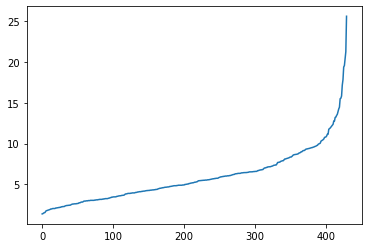

In [13]:
import pandas as pd
from IPython.display import display

times_s = pd.Series(times).sort_values()
display(times_s.describe())
display(times_s.plot(use_index=False))

Estadísticas de cantidad de palabras por clip:

count    430.000000
mean       4.872093
std        1.943230
min        0.000000
25%        3.250000
50%        5.000000
75%        6.000000
max       10.000000
dtype: float64

<AxesSubplot:>

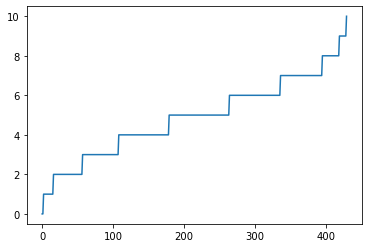

In [21]:
words_s = pd.Series({k: len(v) for k, v in words.items()}).sort_values()
display(words_s.describe())
display(words_s.plot(use_index=False))

Estadísticas acerca de frecuencia de palabras entre todos los clips:

Palabras más comunes: [('sordos', 15), ('cada', 14), ('deporte', 13), ('persona', 12), ('cn', 11), ('así', 11), ('agua', 10), ('argentina', 10), ('hoy', 10), ('carne', 10)]


count    1295.000000
mean        1.617761
std         1.455096
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
dtype: float64

<AxesSubplot:>

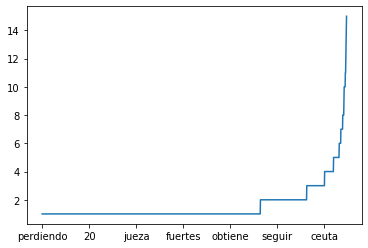

In [36]:
from collections import Counter

total_words = [item for sublist in words.values() for item in sublist]
word_count = Counter(total_words)
print('Palabras más comunes:', word_count.most_common(10))

total_words_s = pd.Series(word_count).sort_values()
display(total_words_s.describe())
display(total_words_s.plot())

Bigramas más comunes: [(('cn', 'sordos'), 11), (('liquido', 'negro'), 4), (('buena', 'alimentación'), 4), (('hacer', 'compost'), 3), (('exportaciones', 'carne'), 3), (('va', 'depender'), 3), (('seis', 'meses'), 3), (('cada', 'persona'), 3), (('personas', 'sordas'), 3), (('lengua', 'señas'), 3)]


count    2014.000000
mean        1.040218
std         0.310235
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
dtype: float64

<AxesSubplot:>

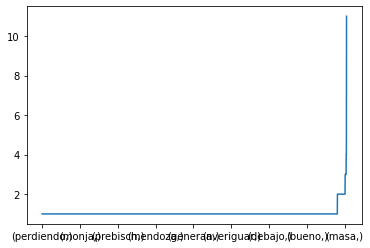

In [35]:
total_bigrams = [tuple(total_words[i:i + 2]) for i in range(len(total_words))]
bigram_count = Counter(total_bigrams)
print('Bigramas más comunes:', bigram_count.most_common(10))

total_bigrams_s = pd.Series(bigram_count).sort_values()
display(total_bigrams_s.describe())
display(total_bigrams_s.plot())